# Sliding Mode Control for Nonlinear Dynamical Systems I
This notebook demonstrates Sliding Mode Control as described in https://en.wikipedia.org/wiki/Sliding_mode_control with the mathematical pendulum system. The aim is to drive the trajectory to the unstable equilibrium point, i.e. to keep the pendulum upright. 

In [9]:
# numpy is a covenient library for fast numerical computation
import numpy as np
# scipy contains an ordinary differential equation (ODE) solver
from scipy.integrate import solve_ivp
# visualization library
import matplotlib.pyplot as plt

In [10]:
# ddx + k sin(x) = 0

In [11]:
# mathematical model for the controlled pendulum centered around a hyperbolic equilibrium point.
def pendulum(t, z, k, cntr, u):
    
    x,vx = z
    
    # equations of motion + control
    dx = vx
    dvx = -k * np.sin(x-np.pi) + cntr*u(x,dx,k)

    return [dx,dvx]

In [12]:
# sliding mode controller
def u(x,dx,k):
    
    res = -(np.abs(dx)+k+1)*np.sign(x+dx)
    return res

In [13]:
# define initial conditions, i.e. state vector z=[v,gamma,x,h] at time t=0
z0 = [0.5,0.5]

# define constants
k = 1

# controls on (1) / off (0)
cntr = 1

In [14]:
# solve the ODE / initial value problem for a set of parameter values
sol0 = solve_ivp(pendulum, [0, 10], z0, args=[k, cntr, u],
                dense_output=True)


In [15]:
# table the solution against time
t = np.linspace(0, 10, 300)
z = sol0.sol(t)

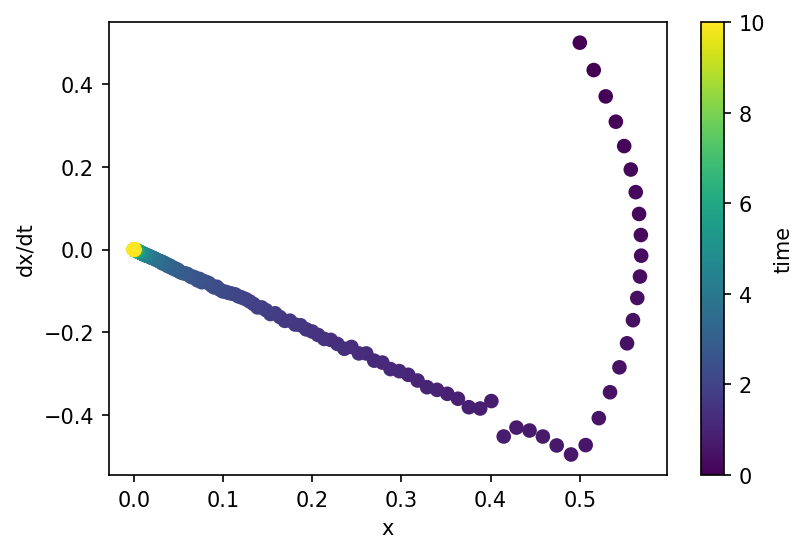

In [16]:
# evolution of the controled pedulum in phase space in arbitrary units
plt.figure(dpi=150, figsize=(6,4))
plt.scatter(z[0,:],z[1,:],c=t)
plt.xlabel('x')
plt.ylabel('dx/dt')
cbar = plt.colorbar()
cbar.set_label('time')
plt.show()